In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer,label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,auc



In [104]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
df.shape

(1599, 12)

In [106]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [108]:
numeric_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
print(df[numeric_cols].skew())

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64


In [109]:
pt=PowerTransformer(method='yeo-johnson')
df[numeric_cols]=pt.fit_transform(df[numeric_cols])

In [110]:
print(df[numeric_cols].skew())


fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002822
sulphates               0.009985
alcohol                 0.112372
dtype: float64


In [111]:
df[numeric_cols].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,4.372571e-15,-5.910080e-16,-3.288315e-16,-1.777468e-15,-1.315326e-15,-7.154308e-16,-6.221137e-16,1.633073e-10,3.768232e-15,-2.310708e-16,3.935243e-12
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-3.446389e+00,-2.957391e+00,-1.531109e+00,-5.026600e+00,-6.615453e+00,-2.940835e+00,-2.434279e+00,-3.642526e+00,-4.053284e+00,-3.993948e+00,-3.075958e+00
25%,-6.707346e-01,-7.515576e-01,-9.298079e-01,-5.971451e-01,-5.070917e-01,-9.027894e-01,-7.355647e-01,-6.024621e-01,-6.424043e-01,-6.809851e-01,-9.217314e-01
50%,-9.467743e-02,5.826261e-02,4.423533e-02,-8.632498e-03,-1.887635e-02,8.910226e-02,3.410317e-02,1.046481e-02,1.704430e-02,-4.784742e-02,-1.879986e-02
75%,6.594381e-01,7.034919e-01,8.138191e-01,5.565652e-01,4.800363e-01,7.153504e-01,7.415433e-01,5.828156e-01,5.930382e-01,7.079726e-01,8.128373e-01
max,2.785266e+00,3.849422e+00,2.860035e+00,2.544370e+00,2.912545e+00,2.789696e+00,3.048395e+00,3.574556e+00,4.115919e+00,2.929811e+00,2.406132e+00


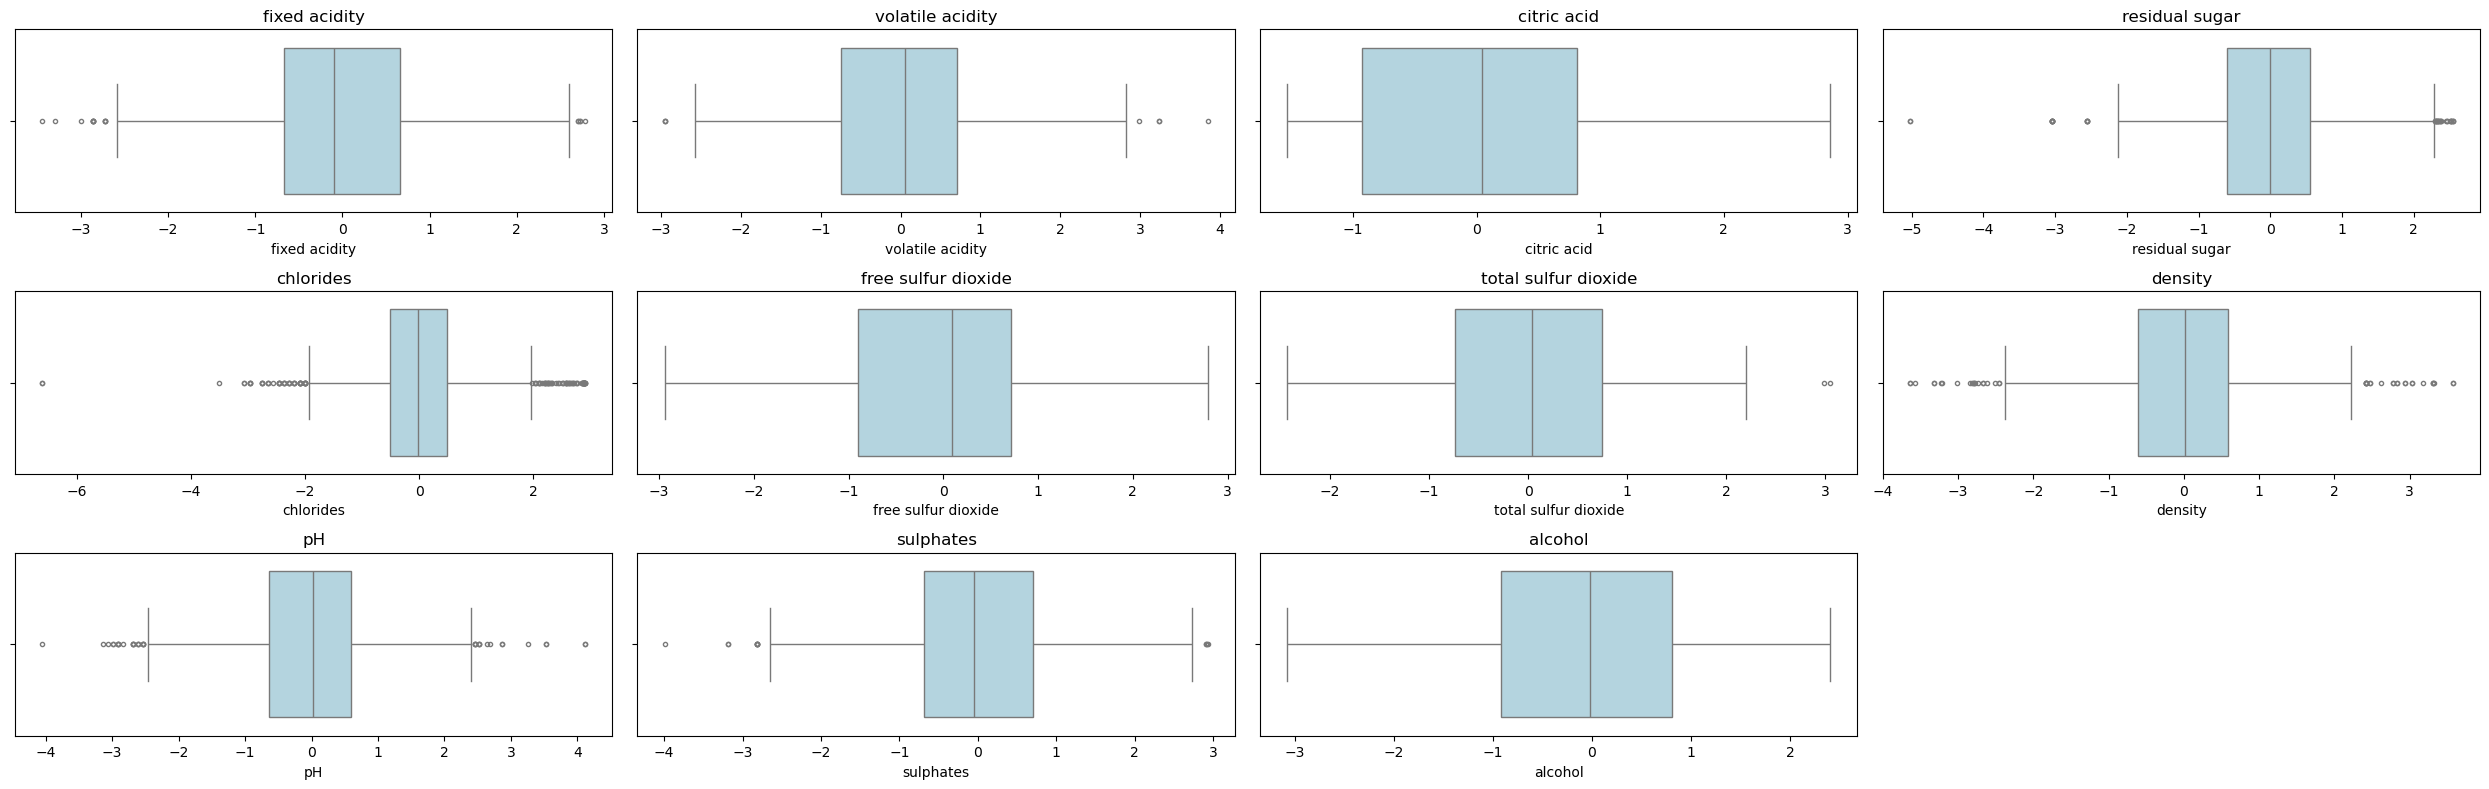

In [112]:
plt.figure(figsize=(25, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='lightblue', fliersize=3)
    plt.title(col)

plt.tight_layout()
plt.show()

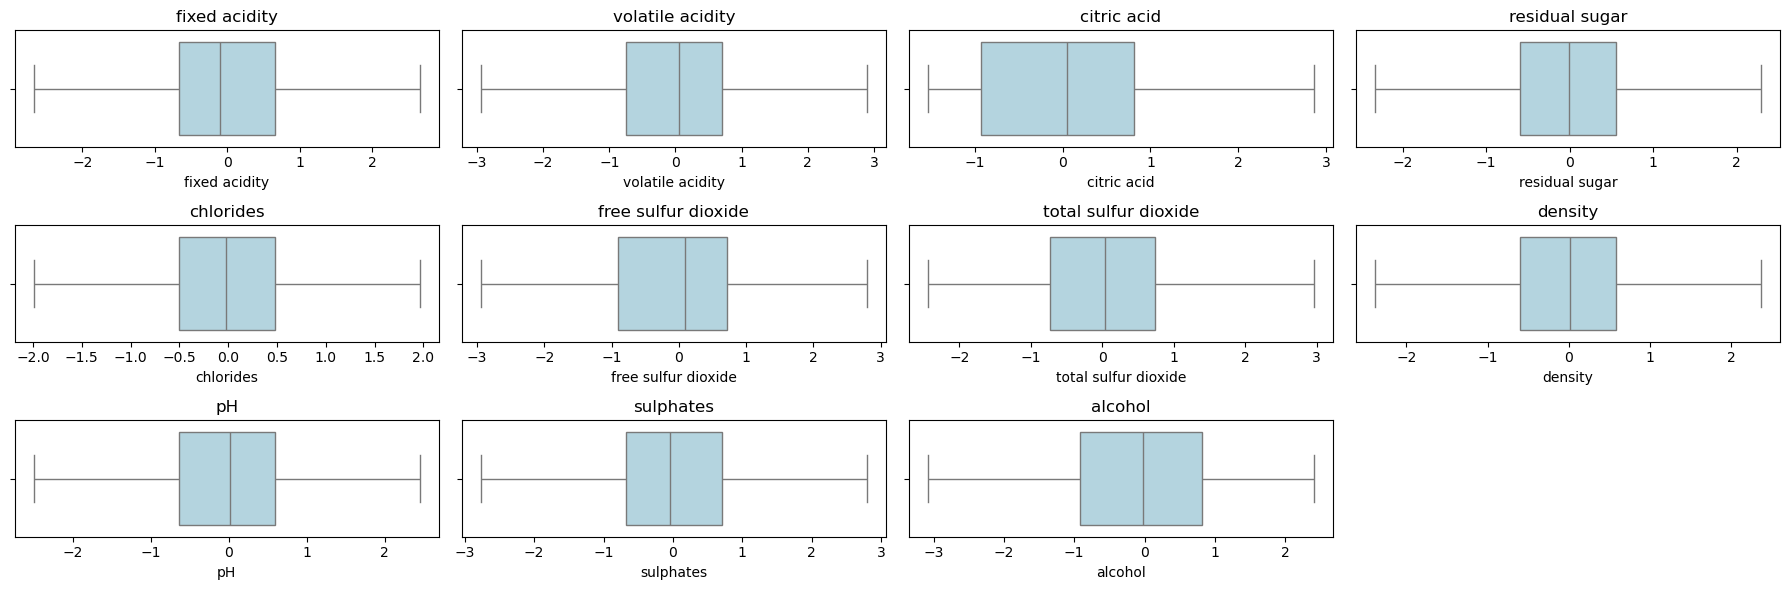

In [113]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

plt.figure(figsize=(18, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,4, i)
    sns.boxplot(x=df[col], color='lightblue', fliersize=3)
    plt.title(col)
plt.tight_layout()
plt.show()

In [114]:
df['quality'] = df['quality'] - 3

In [115]:
df['quality'].value_counts()

quality
2    681
3    638
4    199
1     53
5     18
0     10
Name: count, dtype: int64

In [116]:
X = df.drop('quality', axis=1)
y = df['quality']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [118]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train, y_train = ros.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("After Random Oversampling:", np.bincount(y_train))


After Random Oversampling: [545 545 545 545 545 545]


In [119]:
X_train.shape

(3270, 11)

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:



n_classes = len(np.unique(y_train))
print("Number of classes:", n_classes)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)), 
    Dense(128, activation='relu'),                                          
    Dense(6, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,                
    batch_size=25,
    verbose=0
)


Number of classes: 6


d:\test\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.5750


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[ 0  1  1  0  0  0]
 [ 1  0  6  4  0  0]
 [ 1  6 94 25 10  0]
 [ 0  2 25 84 15  2]
 [ 0  0  2 14 20  4]
 [ 0  0  0  0  2  1]]


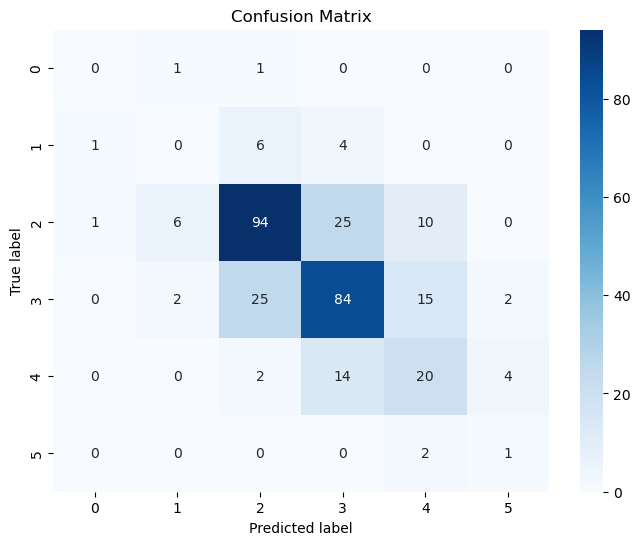

In [ ]:

ypred_probs = model.predict(X_test_scaled)
ypred = np.argmax(ypred_probs, axis=1)

cm = confusion_matrix(y_test, ypred)
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:


# Make sure ytest and predicted probs are set
ypred_probs = model.predict(X_test_scaled)
classes = np.unique(y_test)
n_classes = len(classes)

ytest_bin = label_binarize(y_test, classes=classes)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest_bin[:, i], ypred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
{0: np.float64(0.2940251572327044), 1: np.float64(0.6840247131509267), 2: np.float64(0.7751358695652174), 3: np.float64(0.7276204427083333), 4: np.float64(0.8963392857142858), 5: np.float64(0.8464773922187171)}


In [ ]:

ypred = np.argmax(ypred_probs, axis=1)

print(classification_report(y_test, ypred, digits=4))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.0000    0.0000    0.0000        11
           2     0.6621    0.7059    0.6833       136
           3     0.6270    0.6172    0.6220       128
           4     0.5750    0.5750    0.5750        40
           5     0.0000    0.0000    0.0000         3

    accuracy                         0.6188       320
   macro avg     0.3107    0.3163    0.3134       320
weighted avg     0.6040    0.6188    0.6111       320



d:\test\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\test\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\test\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model.save('wine_mlp_model.h5')
import pickle
with open('wine_scaler.pkl', 'wb') as f: pickle.dump(scaler, f)
with open('wine_powertransform.pkl', 'wb') as f: pickle.dump(pt, f)